1. Simple Line Plots
2. Scatter Plots
3. Visualizing Errors
4. Density and Contour Plots
5. Histograms
6. Binnings
7. Multiple Subplots
8. Three-Dimensional Plotting with Matplotlib

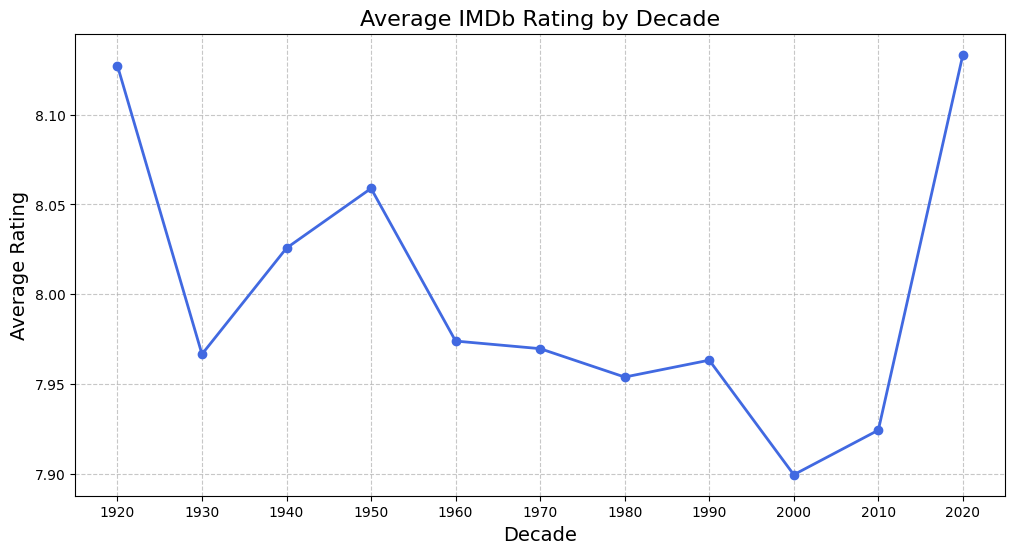

In [3]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\VIRAJ M\Downloads\archive\imdb_top_1000.csv")  # Replace with actual path if needed

# Convert year to decade
# Convert Released_Year to numeric, coercing errors to NaN, and drop rows with NaN in Released_Year
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df = df.dropna(subset=['Released_Year'])

# Convert year to decade
df['Decade'] = (df['Released_Year'].astype(int) // 10) * 10
decade_avg = df.groupby('Decade')['IMDB_Rating'].mean()

plt.figure(figsize=(12, 6))
plt.plot(decade_avg.index, decade_avg.values, marker='o', linestyle='-', color='royalblue', linewidth=2)
plt.title('Average IMDb Rating by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(decade_avg.index)
plt.show()


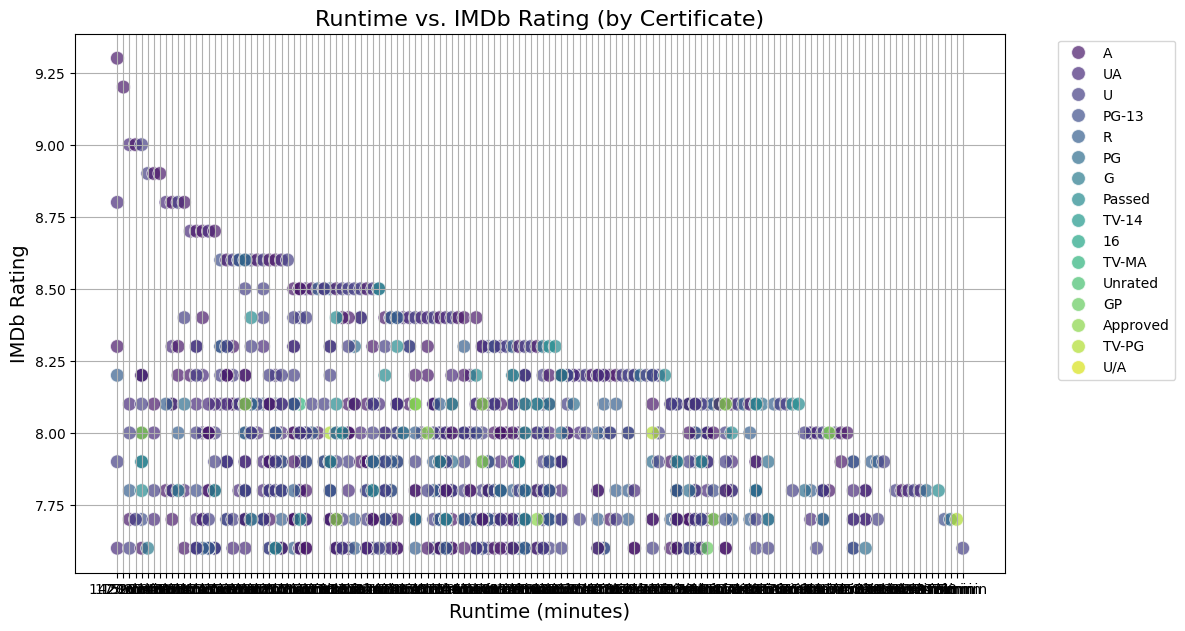

In [5]:
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Runtime', y='IMDB_Rating', hue='Certificate', 
                palette='viridis', alpha=0.7, s=100)
plt.title('Runtime vs. IMDb Rating (by Certificate)', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('IMDb Rating', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

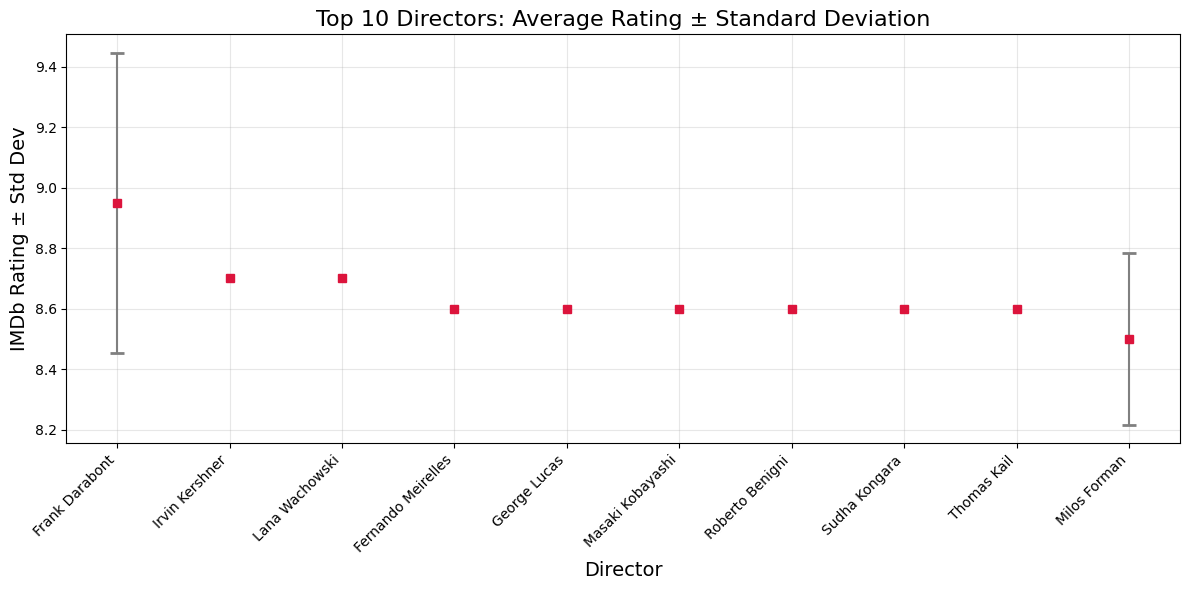

In [6]:
director_stats = df.groupby('Director')['IMDB_Rating'].agg(['mean', 'std']).nlargest(10, 'mean')

plt.figure(figsize=(12, 6))
plt.errorbar(director_stats.index, director_stats['mean'], yerr=director_stats['std'], 
             fmt='s', color='crimson', ecolor='gray', capsize=5, capthick=2)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Directors: Average Rating ± Standard Deviation', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('IMDb Rating ± Std Dev', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

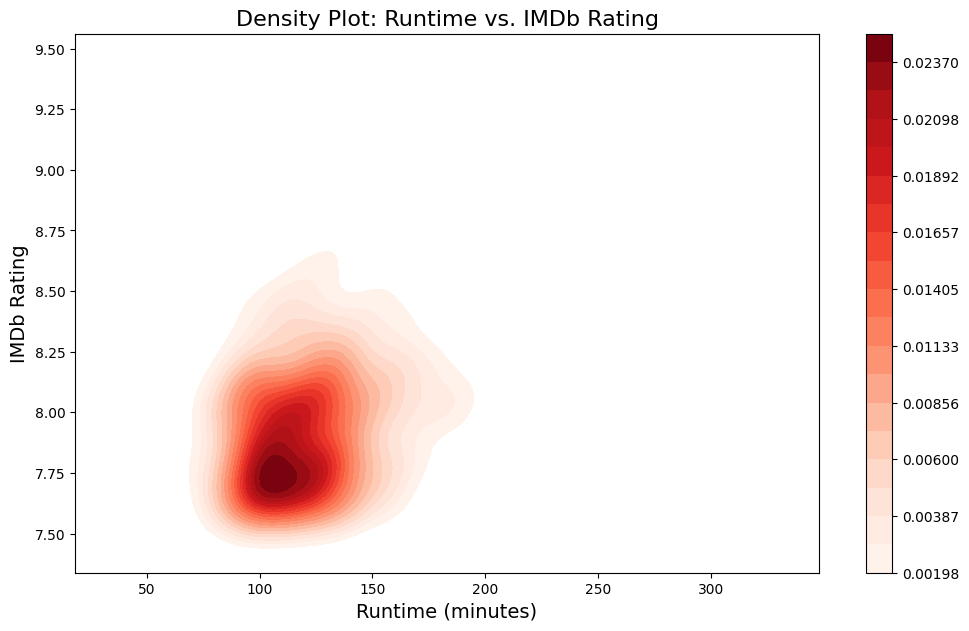

In [10]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df, x='Runtime', y='IMDB_Rating', cmap='Reds', fill=True, levels=20, thresh=0.1, cbar=True)
plt.title('Density Plot: Runtime vs. IMDb Rating', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('IMDb Rating', fontsize=14)
plt.show()

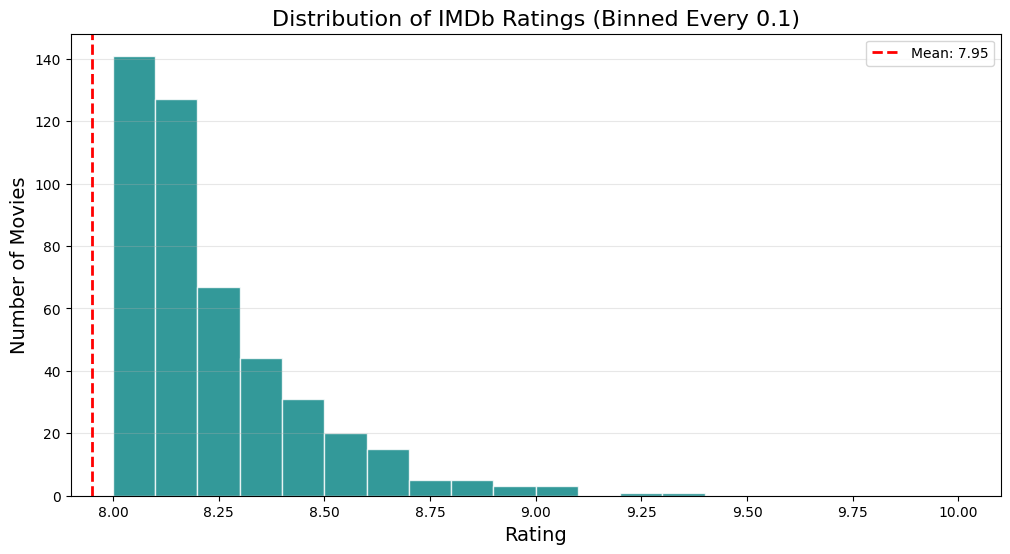

In [12]:
import numpy as np  # Import numpy to fix the NameError

plt.figure(figsize=(12, 6))
plt.hist(df['IMDB_Rating'], bins=np.arange(8, 10.1, 0.1), color='teal', edgecolor='white', alpha=0.8)
plt.title('Distribution of IMDb Ratings (Binned Every 0.1)', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.axvline(df['IMDB_Rating'].mean(), color='red', linestyle='dashed', linewidth=2, 
            label=f'Mean: {df["IMDB_Rating"].mean():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

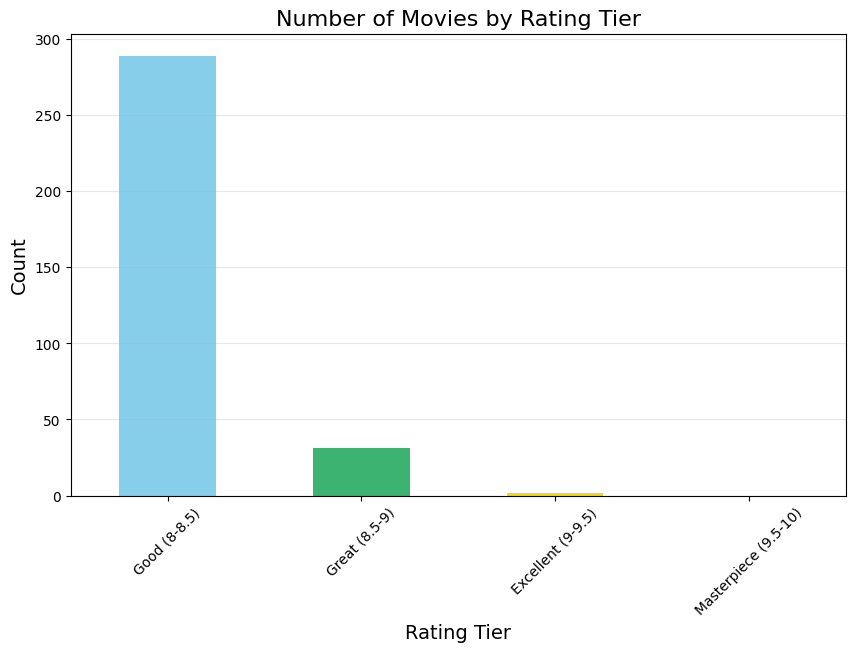

In [13]:
df['Rating_Tier'] = pd.cut(df['IMDB_Rating'], 
                           bins=[8, 8.5, 9, 9.5, 10], 
                           labels=['Good (8-8.5)', 'Great (8.5-9)', 'Excellent (9-9.5)', 'Masterpiece (9.5-10)'])

plt.figure(figsize=(10, 6))
df['Rating_Tier'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'mediumseagreen', 'gold', 'tomato'])
plt.title('Number of Movies by Rating Tier', fontsize=16)
plt.xlabel('Rating Tier', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subplot 1: Runtime
axes[0].hist(df['Runtime'], bins=30, color='salmon', edgecolor='black')
axes[0].set_title('Runtime Distribution', fontsize=14)
axes[0].set_xlabel('Minutes', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Subplot 2: Ratings
axes[1].hist(df['IMDB_Rating'], bins=20, color='lightseagreen', edgecolor='black')
axes[1].set_title('IMDb Rating Distribution', fontsize=14)
axes[1].set_xlabel('Rating', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Subplot 3: Votes (log scale)
axes[2].hist(df['No_of_Votes'], bins=30, color='orchid', edgecolor='black', log=True)
axes[2].set_title('Votes Distribution (Log Scale)', fontsize=14)
axes[2].set_xlabel('Number of Votes', fontsize=12)
axes[2].grid(True, alpha=0.3)

plt.suptitle('Key Movie Metrics Distributions', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

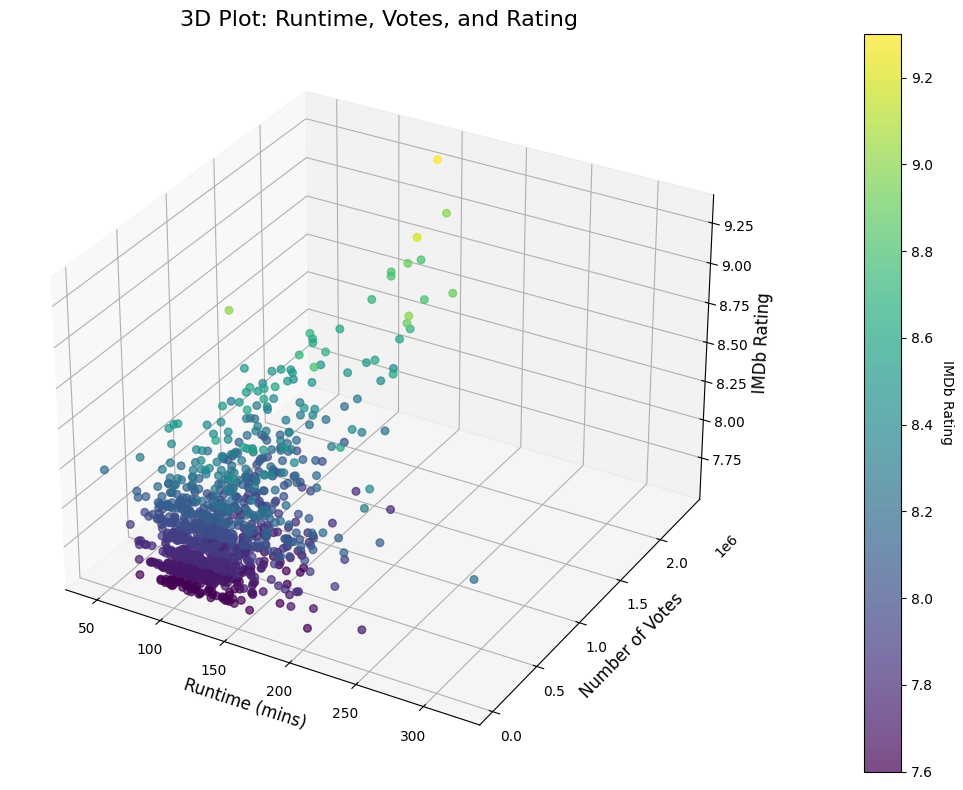

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter(df['Runtime'], df['No_of_Votes'], df['IMDB_Rating'], 
                c=df['IMDB_Rating'], cmap='viridis', s=30, alpha=0.7)

ax.set_xlabel('Runtime (mins)', fontsize=12)
ax.set_ylabel('Number of Votes', fontsize=12)
ax.set_zlabel('IMDb Rating', fontsize=12)
ax.set_title('3D Plot: Runtime, Votes, and Rating', fontsize=16)

# Add colorbar
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('IMDb Rating', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

## Visualisation using seaborn

1. Box Plots
2. Heatmaps
3. KDE / Density Plots


C:\Users\VIRAJ M\AppData\Local\Temp\ipykernel_32284\1366452775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Certificate', y='IMDB_Rating', data=df, palette='Set2')


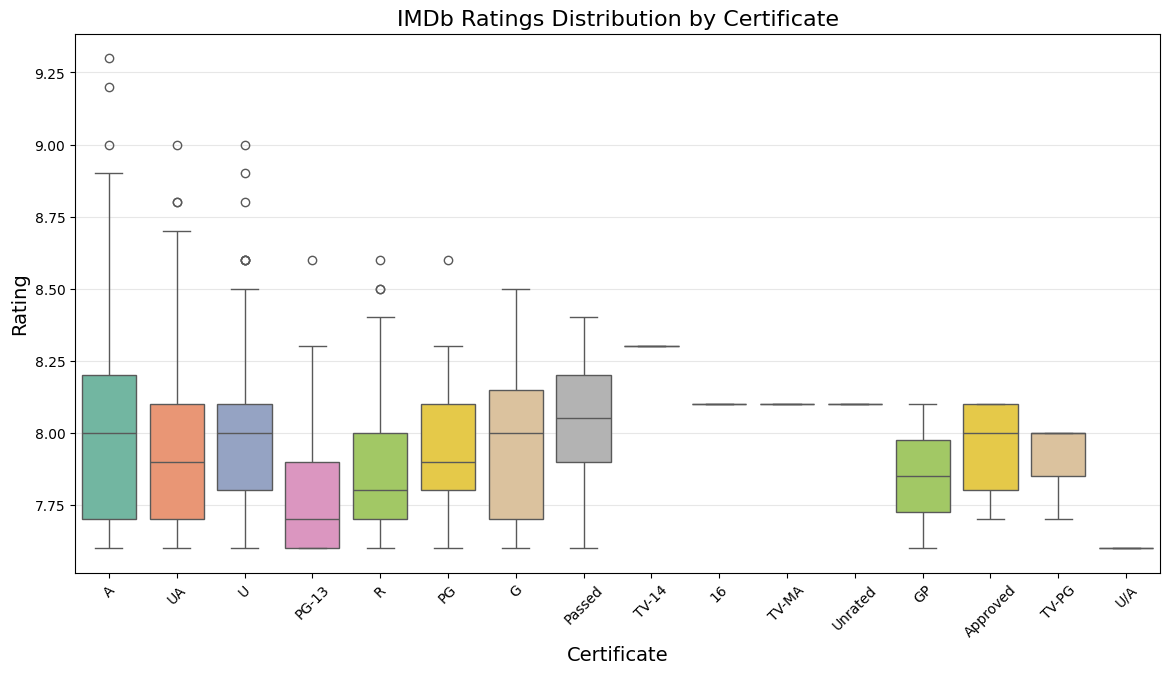

In [15]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Certificate', y='IMDB_Rating', data=df, palette='Set2')
plt.title('IMDb Ratings Distribution by Certificate', fontsize=16)
plt.xlabel('Certificate', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

C:\Users\VIRAJ M\AppData\Local\Temp\ipykernel_32284\1646065133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='IMDB_Rating', data=filtered_df, palette='pastel')


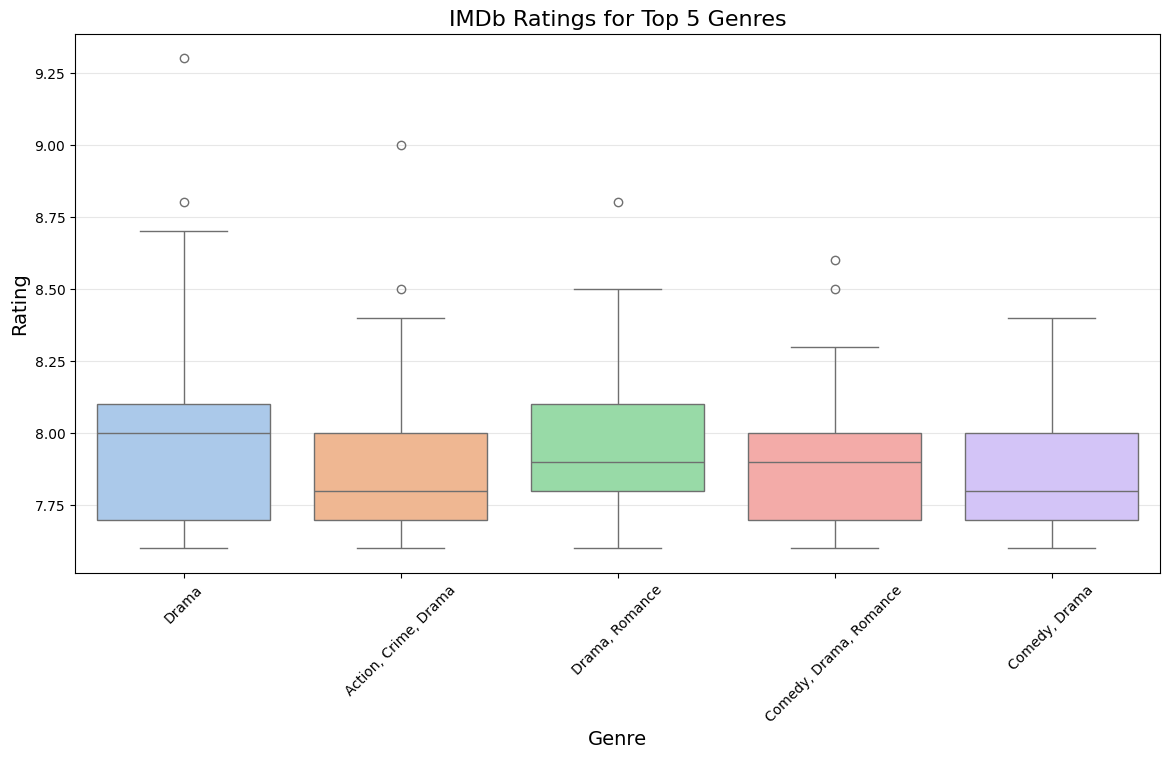

In [16]:
top_genres = df['Genre'].value_counts().head(5).index
filtered_df = df[df['Genre'].isin(top_genres)]

plt.figure(figsize=(14, 7))
sns.boxplot(x='Genre', y='IMDB_Rating', data=filtered_df, palette='pastel')
plt.title('IMDb Ratings for Top 5 Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Certificate', y='Runtime', data=df, 
               palette='coolwarm', inner='quartile')
plt.title('Runtime Distribution by Certificate', fontsize=16)
plt.xlabel('Certificate', fontsize=14)
plt.ylabel('Runtime (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

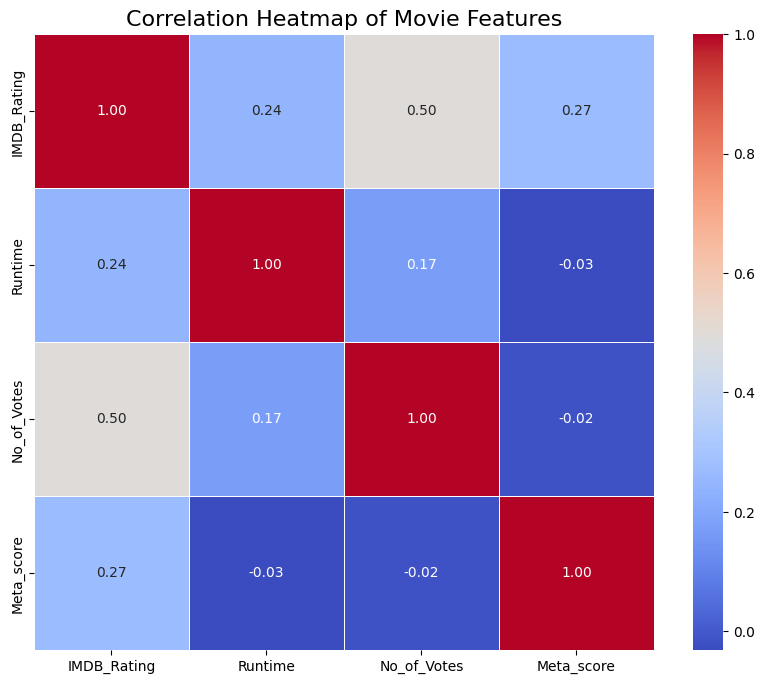

In [17]:
numeric_cols = ['IMDB_Rating', 'Runtime', 'No_of_Votes', 'Meta_score']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Movie Features', fontsize=16)
plt.show()

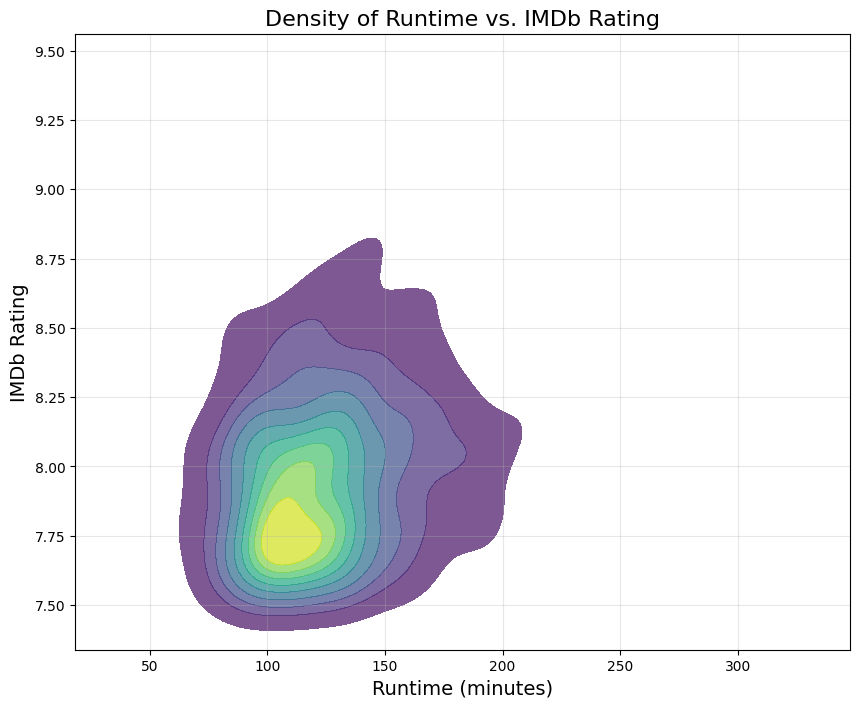

In [18]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df['Runtime'], y=df['IMDB_Rating'], 
            fill=True, cmap='viridis', alpha=0.7)
plt.title('Density of Runtime vs. IMDb Rating', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('IMDb Rating', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

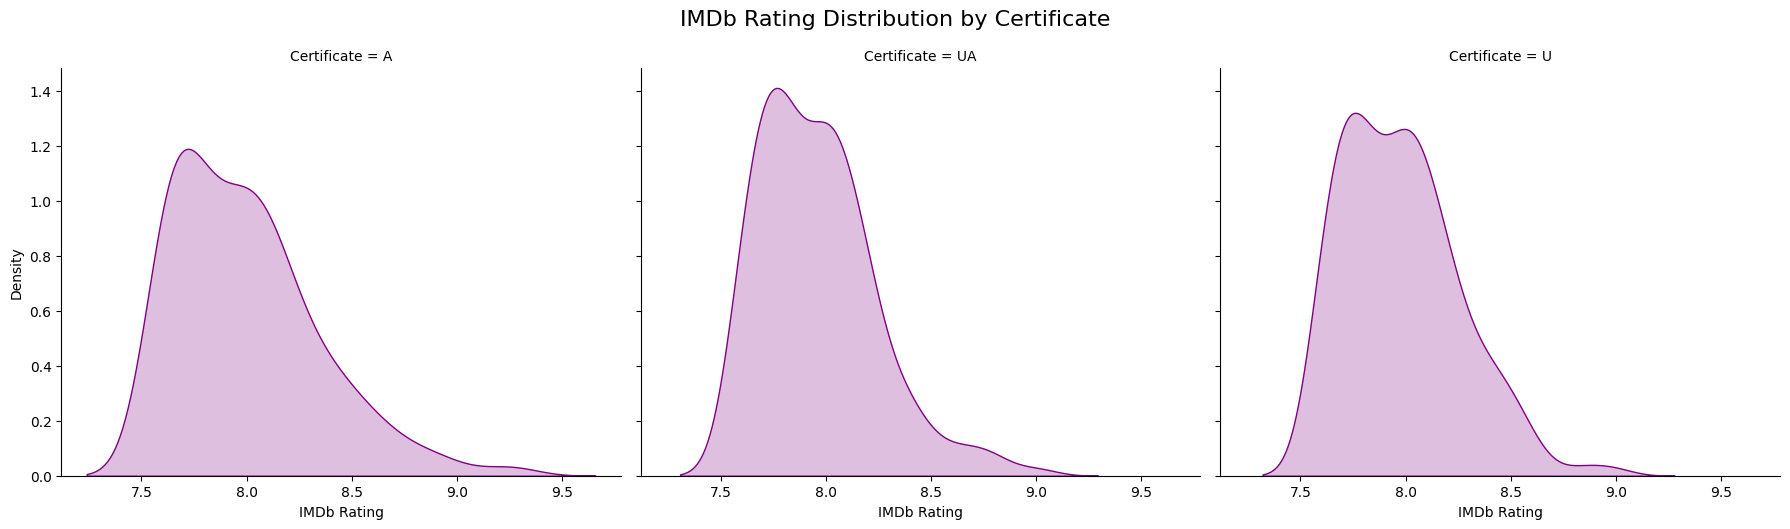

In [19]:
g = sns.FacetGrid(df[df['Certificate'].isin(['A', 'UA', 'U'])], 
                  col='Certificate', height=5, aspect=1.2)
g.map(sns.kdeplot, 'IMDB_Rating', fill=True, color='purple')
g.fig.suptitle('IMDb Rating Distribution by Certificate', y=1.05, fontsize=16)
g.set_axis_labels('IMDb Rating', 'Density')
plt.show()

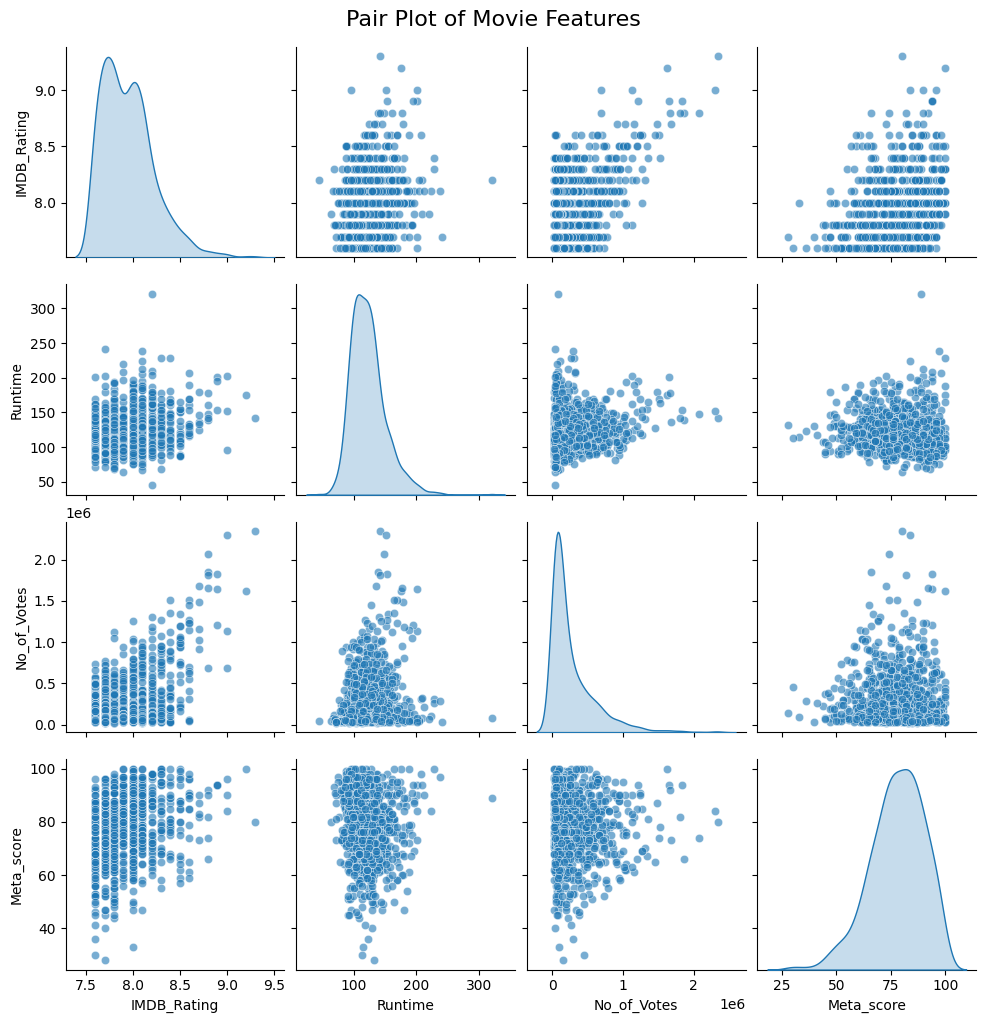

In [20]:
sns.pairplot(df[['IMDB_Rating', 'Runtime', 'No_of_Votes', 'Meta_score']], 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Movie Features', y=1.02, fontsize=16)
plt.show()

C:\Users\VIRAJ M\AppData\Local\Temp\ipykernel_32284\1600928881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df[df['Genre'].isin(top_genres)],


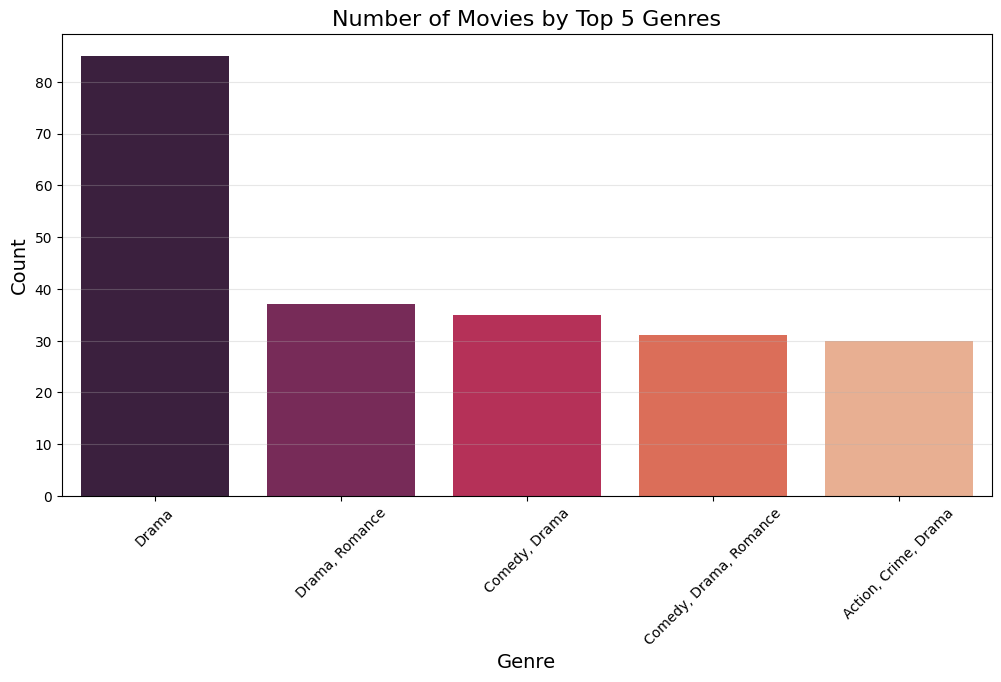

In [21]:
top_genres = df['Genre'].value_counts().head(5).index
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df[df['Genre'].isin(top_genres)], 
              palette='rocket', order=top_genres)
plt.title('Number of Movies by Top 5 Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

## Inferential Statistics

1. Normal Distribution Check
2. Poisson Distribution 
3. Bernoulli Distribution
4. Z- Score
5. P- Value, One tailed and Two Tailed test
6. ANOVA
7. Chi-Squared Test of Independence

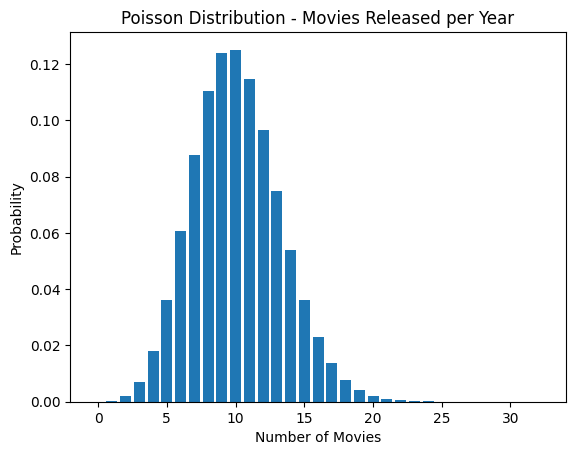

In [22]:
from scipy.stats import poisson

# Count movies per year
year_counts = df["Released_Year"].value_counts()
lam = year_counts.mean()  # lambda parameter

# Generate Poisson PMF
x = np.arange(0, year_counts.max()+1)
pmf = poisson.pmf(x, lam)

# Plot
plt.bar(x, pmf)
plt.title("Poisson Distribution - Movies Released per Year")
plt.xlabel("Number of Movies")
plt.ylabel("Probability")
plt.show()

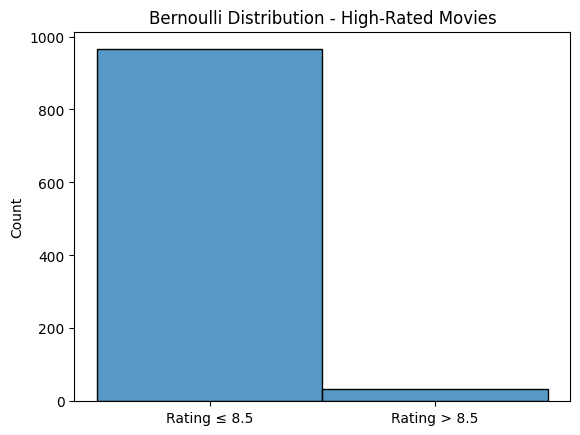

In [23]:
from scipy.stats import bernoulli

# Create binary column: 1 if rating > 8.5, else 0
df["is_high_rated"] = df["IMDB_Rating"].apply(lambda x: 1 if x > 8.5 else 0)
p = df["is_high_rated"].mean()

# Generate and plot
samples = bernoulli.rvs(p, size=1000)
sns.histplot(samples, bins=2, discrete=True)
plt.xticks([0, 1], ["Rating ≤ 8.5", "Rating > 8.5"])
plt.title("Bernoulli Distribution - High-Rated Movies")
plt.show()

In [25]:
from scipy.stats import zscore

# Calculate z-scores for runtime
df["z_runtime"] = zscore(df["Runtime"])
print(df[["Series_Title", "Runtime", "z_runtime"]].sort_values("z_runtime", ascending=False).head())

# Identify outliers (|z| > 3)
outliers = df[np.abs(df["z_runtime"]) > 3]
print(f"\nRuntime outliers found: {len(outliers)}")

                    Series_Title  Runtime  z_runtime
140           Gangs of Wasseypur    321.0   7.053651
812                       Hamlet    242.0   4.241107
314           Gone with the Wind    238.0   4.098700
71   Once Upon a Time in America    229.0   3.778283
116           Lawrence of Arabia    228.0   3.742682

Runtime outliers found: 10


In [26]:
from scipy.stats import ttest_ind

# Compare ratings of two popular genres
action = df[df["Genre"].str.contains("Action")]["IMDB_Rating"].dropna()
drama = df[df["Genre"].str.contains("Drama")]["IMDB_Rating"].dropna()

t_stat, p_val = ttest_ind(action, drama, equal_var=False)
print(f"Action vs Drama Ratings:\nT-statistic: {t_stat:.4f}\nTwo-tailed p-value: {p_val:.4f}")

Action vs Drama Ratings:
T-statistic: -0.4670
Two-tailed p-value: 0.6409


In [28]:
from scipy.stats import f_oneway

# Top 5 certificates
top_certs = df["Certificate"].value_counts().nlargest(5).index
groups = [df[df["Certificate"] == cert]["IMDB_Rating"].dropna() for cert in top_certs]

# Run ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA Results:\nF-statistic: {f_stat:.2f}\np-value: {p_val:.4f}")

# Interpret results
if p_val < 0.05:
    print("\nSignificant difference found between certificate groups")

ANOVA Results:
F-statistic: 8.09
p-value: 0.0000

Significant difference found between certificate groups


In [29]:
from scipy.stats import chi2_contingency

# Create contingency table: Genre vs Certificate
df["Rating_Level"] = pd.cut(df["IMDB_Rating"], 
                           bins=[0, 7, 8, 9, 10],
                           labels=["Low", "Medium", "High", "Exceptional"])

contingency_table = pd.crosstab(df["Genre"].str.split(',').str[0], df["Rating_Level"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test:\nχ² = {chi2:.2f}\np-value = {p:.4f}\nDegrees of Freedom = {dof}")

Chi-Square Test:
χ² = 17.02
p-value = 0.9086
Degrees of Freedom = 26
